# Análisis Exploratorio de Datos (EDA)

### Carga de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Data

In [2]:
InventarioFinal2016 = pd.read_csv(r"/Users/Macbook/Downloads/InventoryDataset/EndInvFINAL12312016.csv")

### Revisión Estructural

In [3]:
InventarioFinal2016.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [4]:
# Para variables cuantitativas

InventarioFinal2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,224489.0,43.505740,23.326415,1.00,23.00,44.00,66.00,81.0
Brand,224489.0,14356.370513,13118.467851,58.00,3798.00,8259.00,23965.00,90631.0
onHand,224489.0,21.763988,37.233576,0.00,7.00,12.00,22.00,3676.0
Price,224489.0,23.585583,79.202775,0.49,9.99,14.99,23.49,13999.9


In [5]:
# Para variables cualitativas

InventarioFinal2016.describe(include = ['object']).T

,count,unique,top,freq
InventoryId,224489,224489,81_PEMBROKE_90604,1
City,223205,67,MOUNTMEND,18065
Description,224489,8732,Jagermeister Liqueur,462
Size,224489,47,750mL,158227
endDate,224489,1,2016-12-31,224489


##### - Se puede apreciar que el campo 'City' tiene un conteo menor de registros.

### Nulos

In [6]:
InventarioFinal2016.isnull().values.sum()

np.int64(1284)

In [7]:
#Verificar si hay filas con valores nulos
filas_nulas = InventarioFinal2016.isnull().any(axis=1)

#Mostrar filas con valores nulos
filas_con_nulos = InventarioFinal2016[filas_nulas]

#Imprimir las filas con valores nulos
if not filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
       InventoryId  Store City  Brand                   Description   Size  \
113895      46__58     46  NaN     58   Gekkeikan Black & Gold Sake  750mL   
113896      46__62     46  NaN     62      Herradura Silver Tequila  750mL   
113897      46__63     46  NaN     63    Herradura Reposado Tequila  750mL   
113898      46__77     46  NaN     77   Three Olives Espresso Vodka  750mL   
113899     46__106     46  NaN    106      Mr Boston Peach Schnapps  Liter   
...            ...    ...  ...    ...                           ...    ...   
115174   46__46447     46  NaN  46447         Gascon Malbec Mendoza  750mL   
115175   46__46458     46  NaN  46458      Layer Cake Barosa Shiraz  750mL   
115176   46__46476     46  NaN  46476          Tilia Malbec Mendoza  750mL   
115177   46__46764     46  NaN  46764  Clayhouse Adobe Red Paso Rbl  750mL   
115178   46__46830     46  NaN  46830         Pacific Rim Sweet Rsl  750mL   

        onHand  Price     

##### - Hay 1,284 valores nulos en el campo 'City'.

# Limpieza y Procesamiento de Datos (ETL)

### Completar los valores nulos

In [8]:
# Se sabe que estos nulos pertenecen a la misma tienda
# Reemplazar valores nulos en la columna 'City' con un valor específico, como 'Unknown'

InventarioFinal2016['City'].fillna('TYWARDREATH', inplace = True)

/var/folders/c6/d3t23tts3l9fhhydkx1_2_4m0000gp/T/ipykernel_7045/3816269605.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  InventarioFinal2016['City'].fillna('TYWARDREATH', inplace = True)


### Verificar los valores nulos

In [9]:
# Verificar si aún quedan valores nulos

print("Valores nulos en 'City' después de reemplazo:", InventarioFinal2016['City'].isnull().sum())

Valores nulos en 'City' después de reemplazo: 0


### Guardar la data en archivo .CSV

In [10]:

# Guardar el DataFrame filtrado en un archivo CSV
InventarioFinal2016.to_csv('/Users/Macbook/DISLICORES/DISLICORES/CSVFinales/InventarioFinal2016.csv', index=False)


# Visualización

### Mapa de calor para la correlación de variables cuantitativas

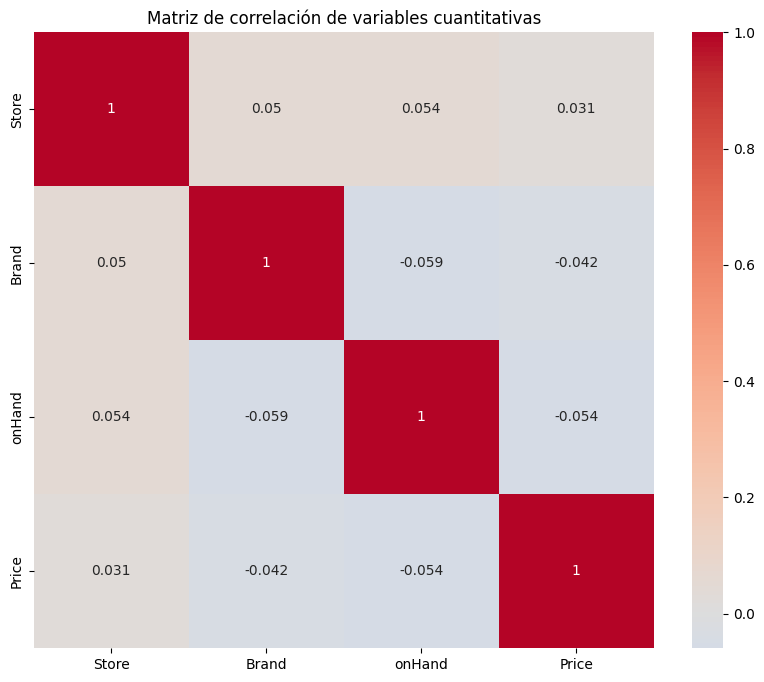

In [11]:
columns = ['Store', 'Brand', 'onHand', 'Price']
correlation_matrix = InventarioFinal2016[columns].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Matriz de correlación de variables cuantitativas')
plt.show()